<a href="https://colab.research.google.com/github/ignacioquirogaa/Entregas-Data_Science_2/blob/main/ProyectoDS2_ParteI_Quiroga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final
## Primera Entrega
### Archivo: ProyectoDS2_ParteI_Quiroga.ipynb

En este Dataset "Superstore Dataset" sacado de Kaggle se encuentran datos sobre 10.000 compras hechas en hipermercados de distintas ciudades de Estados Unidos.Cada registro tiene el campo de “Row ID” como Primary Key, cada pedido realizado dentro de la compra tiene su respectivo id, fecha de realización, fecha de envío, modo de envío, el id, nombre y tipo de cliente, como también el país, ciudad, estado, código postal y región de donde se realizó.
Los productos tienen su respectivo id, categoría, subcategoría, nombre, precio unitario, cantidades que se compraron, precio final y el porcentaje del descuento que se aplicó, como también la ganancia que generaron.

El objetivo del proyecto es analizar los datos de compras en hipermercados de Estados Unidos desde una perspectiva descriptiva y visual, respondiendo preguntas clave sobre los productos más vendidos, la rentabilidad por segmento y la distribución geográfica de las ventas. Para ello se aplican técnicas de análisis univariado, bivariado y multivariado, utilizando herramientas como pandas, Matplotlib y Seaborn para explorar, visualizar y entender mejor el comportamiento del negocio.

El análisis comienza con una limpieza básica de los datos, incluyendo la detección de valores faltantes y posibles inconsistencias. Luego se generan visualizaciones que ayudan a comprender patrones, distribuciones y relaciones entre variables. Esta etapa exploratoria es clave para responder preguntas iniciales sobre ventas, clientes y productos, y sirve como base para futuros modelos predictivos, segmentaciones o sistemas de recomendación.

#❓Preguntas / Hipótesis


*   ¿Qué ciudades realizaron más compras?
*   ¿Qué categorías de productos fueron la más vendida?
*   ¿Como evolucionaron las compras a lo largo de los meses?
*   ¿Qué región realizó mas compras?
*   ¿Qué tipo de cliente realizó más compras?
*   ¿Cuáles fueron los clientes que más compras realizaron?




# 🎯 Objetivo del Proyecto
El objetivo del proyecto es analizar todas las compras realizadas en distintos hipermercados para poder sacar conclusiones sobre cuáles son los productos menos vendidos, más vendidos, en qué zonas se realizan mas compras, y en cuáles menos, en qué mes es mas rentable y en cuál menos. También se busca identificar patrones de consumo y variaciones en los precios, con el fin de generar información para los hipermercados y sus ventas.

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [30]:
raw_table_csv = "https://raw.githubusercontent.com/ignacioquirogaa/Entregas-Data_Science_1/main/Sample%20-%20Superstore.csv"

In [31]:
# Cargar datos
df = pd.read_csv(raw_table_csv, index_col=0, encoding='latin1')
df.head()

Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
Row ID                                                                       
1       CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
3       CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
4       US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
5       US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

          Customer Name    Segment        Country             City  \
Row ID                                                               
1           Claire Gute   Consumer  United States        Henderson   
2           Claire Gute   Consumer  United States        Henderson   
3       Darrin Van Huff  Corporate  United States      Los Angeles   
4        Sean O'Donnell   Consumer  United States  Fort Lauderdale   
5        Sean O'Donnell   Consumer  United States  Fort Lauderdale   

             State  Postal Code Region       Product ID         Category  \
Row ID                                                                     
1         Kentucky        42420  South  FUR-BO-10001798        Furniture   
2         Kentucky        42420  South  FUR-CH-10000454        Furniture   
3       California        90036   West  OFF-LA-10000240  Office Supplies   
4          Florida        33311  South  FUR-TA-10000577        Furniture   
5          Florida        33311  South  OFF-ST-10000760  Office Supplies   

       Sub-Category                                       Product Name  \
Row ID                                                                   
1         Bookcases                  Bush Somerset Collection Bookcase   
2            Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs,...   
3            Labels  Self-Adhesive Address Labels for Typewriters b...   
4            Tables      Bretford CR4500 Series Slim Rectangular Table   
5           Storage                     Eldon Fold 'N Roll Cart System   

           Sales  Quantity  Discount    Profit  
Row ID                                          
1       261.9600         2      0.00   41.9136  
2       731.9400         3      0.00  219.5820  
3        14.6200         2      0.00    6.8714  
4       957.5775         5      0.45 -383.0310  
5        22.3680         2      0.20    2.5164

# Valores Faltantes

In [32]:
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]

Series([], dtype: int64)

# Acciones que podria realizar para mi dataset

* Eliminar la columna "Country" ya que en todos los registros es Estados Unidos
* Eliminar la columna "Postal Code" ya que es información irrelevante
* Columnas como "Order ID", "Customer ID" y "Product ID" no decido eliminarlas ya que pueden ser utilizadas para Normalizar el dataset en un futuro
* Crear nuevas variables **(feature engineering)** para emplear mejores gráficos como "Shipping_Days" para ver la diferencia en días entre la compra y la llegada del producto y "Year Order Date" para obtener el año de la compra y poder usar gráficos por años.

In [33]:
df.drop(columns=['Country','Postal Code'], inplace=True)

In [34]:
df

Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
Row ID                                                                       
1       CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
3       CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
4       US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
5       US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
...                ...         ...         ...             ...         ...   
9990    CA-2014-110422   1/21/2014   1/23/2014    Second Class    TB-21400   
9991    CA-2017-121258   2/26/2017    3/3/2017  Standard Class    DB-13060   
9992    CA-2017-121258   2/26/2017    3/3/2017  Standard Class    DB-13060   
9993    CA-2017-121258   2/26/2017    3/3/2017  Standard Class    DB-13060   
9994    CA-2017-119914    5/4/2017    5/9/2017    Second Class    CC-12220   

           Customer Name    Segment             City       State Region  \
Row ID                                                                    
1            Claire Gute   Consumer        Henderson    Kentucky  South   
2            Claire Gute   Consumer        Henderson    Kentucky  South   
3        Darrin Van Huff  Corporate      Los Angeles  California   West   
4         Sean O'Donnell   Consumer  Fort Lauderdale     Florida  South   
5         Sean O'Donnell   Consumer  Fort Lauderdale     Florida  South   
...                  ...        ...              ...         ...    ...   
9990    Tom Boeckenhauer   Consumer            Miami     Florida  South   
9991         Dave Brooks   Consumer       Costa Mesa  California   West   
9992         Dave Brooks   Consumer       Costa Mesa  California   West   
9993         Dave Brooks   Consumer       Costa Mesa  California   West   
9994        Chris Cortes   Consumer      Westminster  California   West   

             Product ID         Category Sub-Category  \
Row ID                                                  
1       FUR-BO-10001798        Furniture    Bookcases   
2       FUR-CH-10000454        Furniture       Chairs   
3       OFF-LA-10000240  Office Supplies       Labels   
4       FUR-TA-10000577        Furniture       Tables   
5       OFF-ST-10000760  Office Supplies      Storage   
...                 ...              ...          ...   
9990    FUR-FU-10001889        Furniture  Furnishings   
9991    FUR-FU-10000747        Furniture  Furnishings   
9992    TEC-PH-10003645       Technology       Phones   
9993    OFF-PA-10004041  Office Supplies        Paper   
9994    OFF-AP-10002684  Office Supplies   Appliances   

                                             Product Name     Sales  Quantity  \
Row ID                                                                          
1                       Bush Somerset Collection Bookcase  261.9600         2   
2       Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
3       Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
4           Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
5                          Eldon Fold 'N Roll Cart System   22.3680         2   
...                                                   ...       ...       ...   
9990                               Ultra Door Pull Handle   25.2480         3   
9991    Tenex B1-RE Series Chair Mats for Low Pile Car...   91.9600         2   
9992                                Aastra 57i VoIP phone  258.5760         2   
9993    It's Hot Message Books with Stickers, 2 3/4" x 5"   29.6000         4   
9994    Acco 7-Outlet Masterpiece Power Center, Wihtou...  243.1600         2   

        Discount    Profit  
Row ID                      
1           0.00   41.9136  
2           0.00  219.5820  
3           0.00    6.8714  
4           0.45 -383.0310  
5           0.20    2.5164  
...          ...       .

# 🅰 2. Análisis Univariado
Cantidad de compras por Categoría


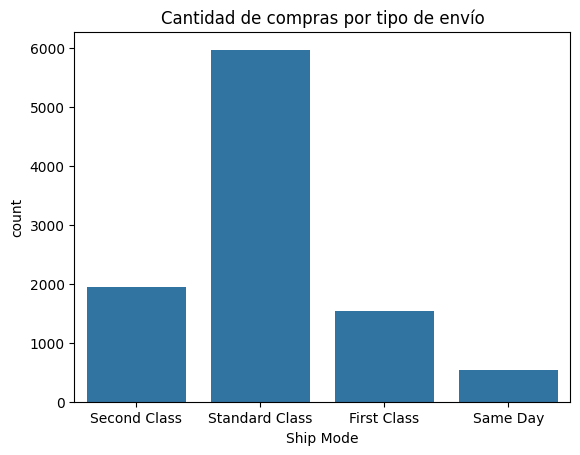

In [35]:
sns.countplot(x='Ship Mode', data=df)
plt.title('Cantidad de compras por tipo de envío')
plt.show()

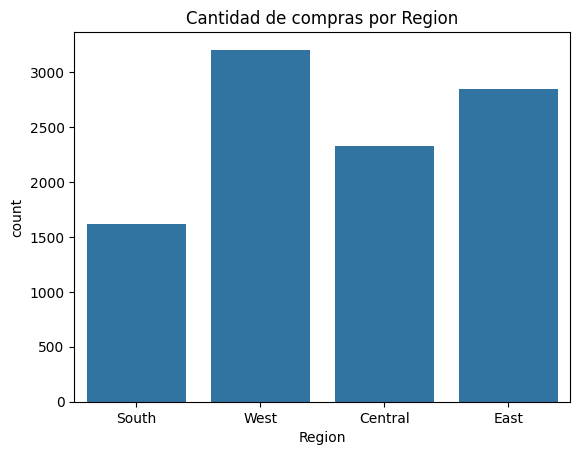

In [36]:
sns.countplot(x='Region', data=df)
plt.title('Cantidad de compras por Region')
plt.show()

# 👉 Interpretación:
* El tipo de envío de Standar Class es el más elegido con diferencia
* West (Oeste) es la región con más compras aunque sin destacar demasiado sobre las demás

# 🆎 3. Análisis Bivariado
Cantidad de compras por ciudad

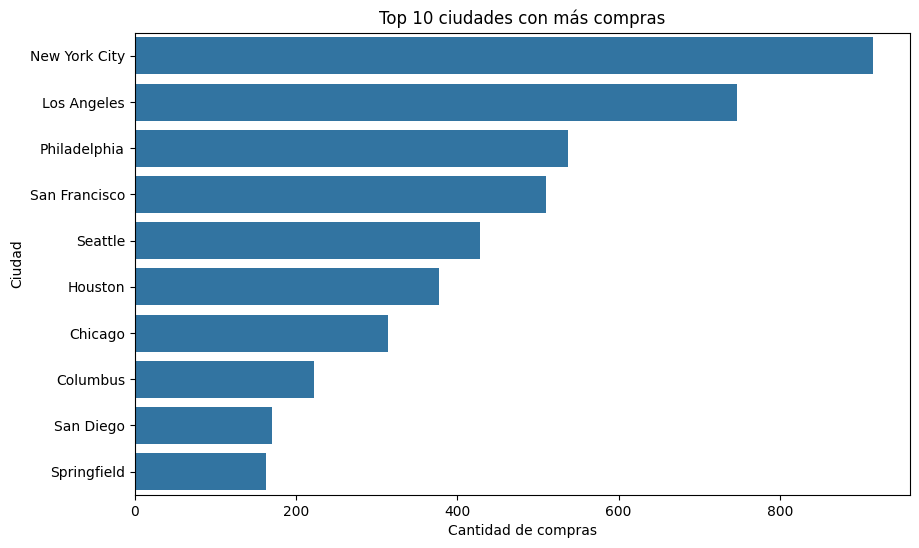

In [37]:
top_10_cities = df['City'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_cities.values, y=top_10_cities.index)
plt.title("Top 10 ciudades con más compras")
plt.xlabel("Cantidad de compras")
plt.ylabel("Ciudad")
plt.show()

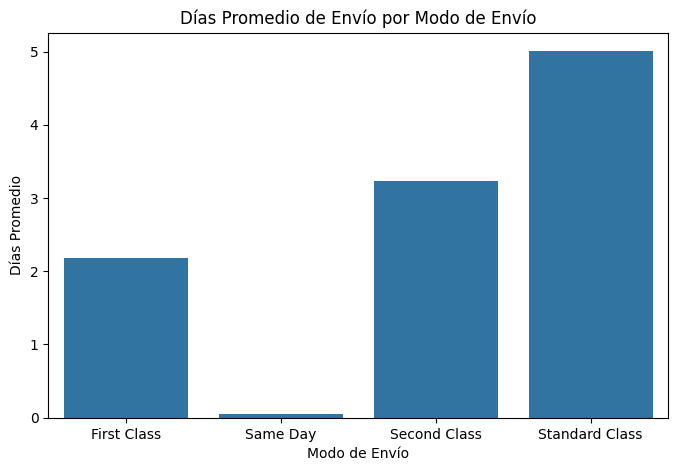

In [38]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')

df['Shipping_Days'] = (df['Ship Date'] - df['Order Date']).dt.days

avg_shipping_days = df.groupby('Ship Mode')['Shipping_Days'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='Ship Mode', y='Shipping_Days', data=avg_shipping_days)
plt.title('Días Promedio de Envío por Modo de Envío')
plt.xlabel('Modo de Envío')
plt.ylabel('Días Promedio')
plt.show()


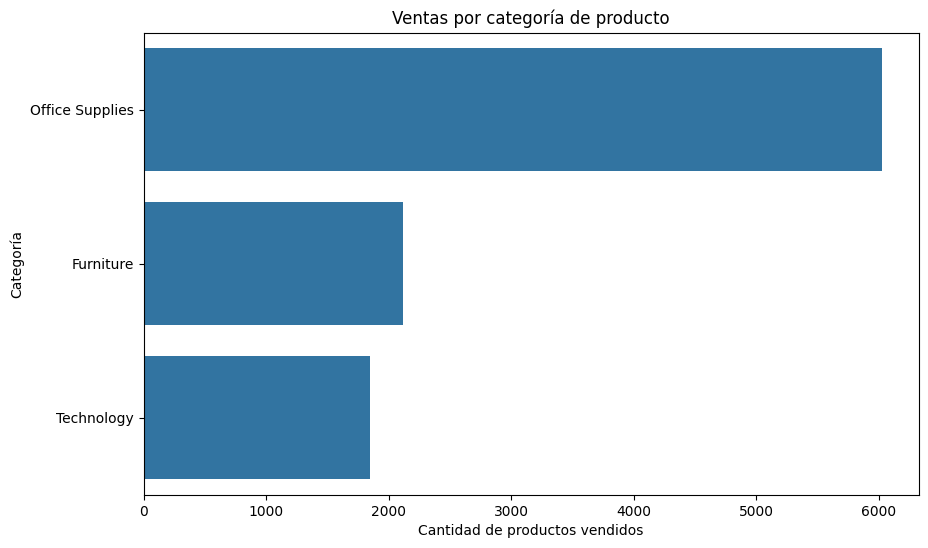

In [39]:
# Conteo de productos por categoría
category_counts = df['Category'].value_counts()

# Gráfico bivariado: Categoría vs. Cantidad de ventas
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.values, y=category_counts.index)
plt.title("Ventas por categoría de producto")
plt.xlabel("Cantidad de productos vendidos")
plt.ylabel("Categoría")
plt.show()


# 👉 Interpretación:
* New York City es la ciudad con más compras realizadas
* La categoria de productos más comprada es Office Supplies

# 🔤 4. Análisis Multivariado
Cantidad de compras por año y region

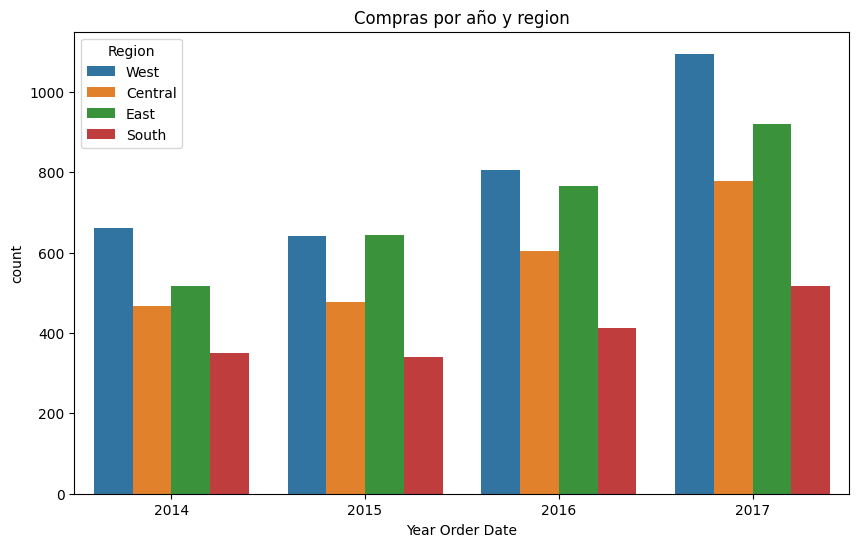

In [40]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y', errors='coerce')
df['Year Order Date'] = df['Order Date'].dt.year

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Year Order Date', hue='Region')
plt.title('Compras por año y region')
plt.show()

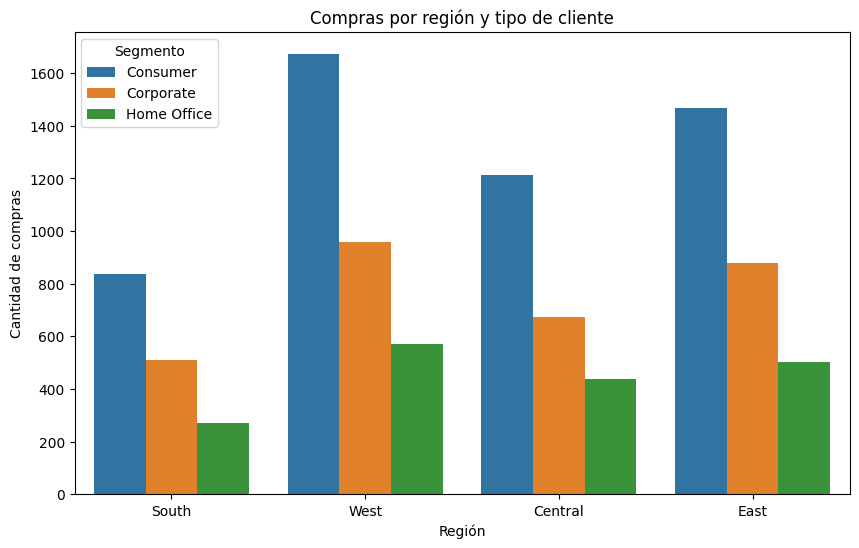

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Region', hue='Segment')
plt.title("Compras por región y tipo de cliente")
plt.xlabel("Región")
plt.ylabel("Cantidad de compras")
plt.legend(title="Segmento")
plt.show()


# 👉 Interpretación:
* En los años 2014, 2015 y 2016 se ven unas compras similares pero en 2017 se elevaron las compras predominando la región West
* El tipo de cliente Consumer es el que más compras realiazó predominando en la región West

# Aplicar algun metodo de Outliers Detection

In [42]:
valores_nulos = df.isna().sum().sort_values(ascending=False)

porcentaje_nulos = df.isna().mean().sort_values(ascending=False) * 100

missing_df = pd.concat([valores_nulos, porcentaje_nulos], axis=1)
missing_df.columns = ['Cantidad Nulos', 'Porcentaje (%)']
print(missing_df)

                 Cantidad Nulos  Porcentaje (%)
Order ID                      0             0.0
Order Date                    0             0.0
Ship Date                     0             0.0
Ship Mode                     0             0.0
Customer ID                   0             0.0
Customer Name                 0             0.0
Segment                       0             0.0
City                          0             0.0
State                         0             0.0
Region                        0             0.0
Product ID                    0             0.0
Category                      0             0.0
Sub-Category                  0             0.0
Product Name                  0             0.0
Sales                         0             0.0
Quantity                      0             0.0
Discount                      0             0.0
Profit                        0             0.0
Shipping_Days                 0             0.0
Year Order Date               0         

Previamente a utilizar algún método para detectar valores outliers se realiza una prueba previa de valores erroneos.

In [43]:
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
# 1. Ventas negativas
hay_ventas_negativas = (df['Sales'] < 0).any()

# 2. Cantidades menores o iguales a cero
hay_cantidades_invalidas = (df['Quantity'] <= 0).any()

# 3. Descuentos fuera del rango [0,1]
hay_descuentos_invalidos = (~df['Discount'].between(0, 1)).any()

# 4. Sales extremadamente altos
hay_sales_extremo = (df['Sales'] > 5000).any()

# Mostrar resumen
print("¿Hay ventas negativas?: ", hay_ventas_negativas)
print("¿Hay cantidades <= 0?: ", hay_cantidades_invalidas)
print("¿Hay descuentos fuera del rango 0-1?: ", hay_descuentos_invalidos)
print("¿Hay valores extremos de Sales > 5000?: ", hay_sales_extremo)


¿Hay ventas negativas?:  False
¿Hay cantidades <= 0?:  False
¿Hay descuentos fuera del rango 0-1?:  False
¿Hay valores extremos de Sales > 5000?:  True


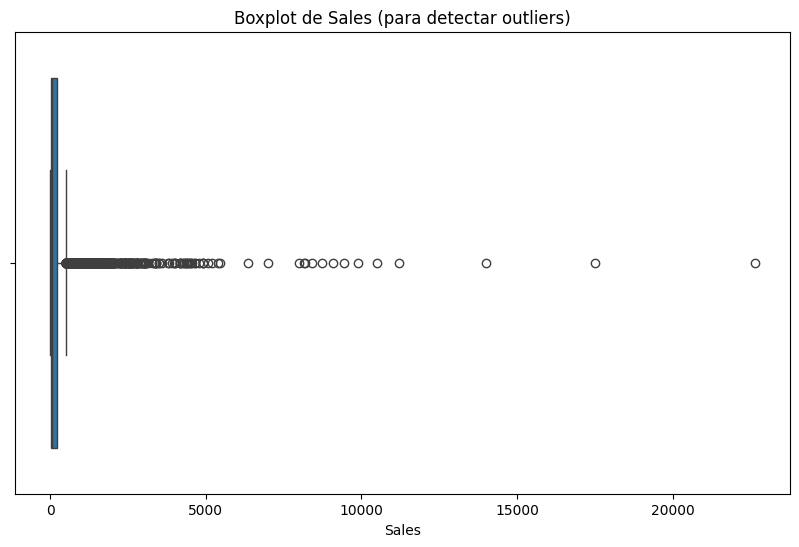

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Sales')
plt.title("Boxplot de Sales (para detectar outliers)")
plt.show()


In [45]:
original_size = df.shape[0]
print(f"Tamaño original del dataset: {original_size}")

Tamaño original del dataset: 9994


# 📊 ¿Qué es el método IQR?

El método del Rango Intercuartílico (IQR) es una técnica estadística utilizada para detectar valores atípicos (outliers) en una variable numérica.

Se basa en los cuartiles:
- **Q1**: primer cuartil (percentil 25)
- **Q3**: tercer cuartil (percentil 75)
- **IQR = Q3 - Q1**

Con estos valores se calculan los **límites** aceptables:
- **Límite inferior** = Q1 - 1.5 × IQR
- **Límite superior** = Q3 + 1.5 × IQR

Los valores que quedan por fuera de estos límites se consideran outliers.


In [46]:
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df_sin_outliers_iqr = df[(df['Sales'] >= limite_inferior) & (df['Sales'] <= limite_superior)]
iqr_size = df_sin_outliers_iqr.shape[0]
iqr_removed = original_size - iqr_size
percentage_eliminated = (iqr_removed / original_size) * 100

print(f"Se eliminaron {iqr_removed} registros como outliers en 'Sales' ({percentage_eliminated:.2f}%)")

Se eliminaron 1167 registros como outliers en 'Sales' (11.68%)


# ✅ Resultados del filtrado

Luego de aplicar el método IQR sobre la variable `Sales`, se eliminaron los valores que se encontraban fuera de los límites estadísticos normales.

Esto representó una pérdida del **11.68% de los datos** (reemplazado dinámicamente), generando un nuevo DataFrame llamado `df_sin_outliers_iqr`, que puede usarse para un análisis más robusto y sin distorsiones por valores extremos.


In [47]:
df_sin_outliers_iqr

Order ID Order Date  Ship Date       Ship Mode Customer ID  \
Row ID                                                                     
1       CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
3       CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
5       US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
6       CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   
7       CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   
...                ...        ...        ...             ...         ...   
9990    CA-2014-110422 2014-01-21 2014-01-23    Second Class    TB-21400   
9991    CA-2017-121258 2017-02-26 2017-03-03  Standard Class    DB-13060   
9992    CA-2017-121258 2017-02-26 2017-03-03  Standard Class    DB-13060   
9993    CA-2017-121258 2017-02-26 2017-03-03  Standard Class    DB-13060   
9994    CA-2017-119914 2017-05-04 2017-05-09    Second Class    CC-12220   

           Customer Name    Segment             City       State Region  \
Row ID                                                                    
1            Claire Gute   Consumer        Henderson    Kentucky  South   
3        Darrin Van Huff  Corporate      Los Angeles  California   West   
5         Sean O'Donnell   Consumer  Fort Lauderdale     Florida  South   
6        Brosina Hoffman   Consumer      Los Angeles  California   West   
7        Brosina Hoffman   Consumer      Los Angeles  California   West   
...                  ...        ...              ...         ...    ...   
9990    Tom Boeckenhauer   Consumer            Miami     Florida  South   
9991         Dave Brooks   Consumer       Costa Mesa  California   West   
9992         Dave Brooks   Consumer       Costa Mesa  California   West   
9993         Dave Brooks   Consumer       Costa Mesa  California   West   
9994        Chris Cortes   Consumer      Westminster  California   West   

             Product ID         Category Sub-Category  \
Row ID                                                  
1       FUR-BO-10001798        Furniture    Bookcases   
3       OFF-LA-10000240  Office Supplies       Labels   
5       OFF-ST-10000760  Office Supplies      Storage   
6       FUR-FU-10001487        Furniture  Furnishings   
7       OFF-AR-10002833  Office Supplies          Art   
...                 ...              ...          ...   
9990    FUR-FU-10001889        Furniture  Furnishings   
9991    FUR-FU-10000747        Furniture  Furnishings   
9992    TEC-PH-10003645       Technology       Phones   
9993    OFF-PA-10004041  Office Supplies        Paper   
9994    OFF-AP-10002684  Office Supplies   Appliances   

                                             Product Name    Sales  Quantity  \
Row ID                                                                         
1                       Bush Somerset Collection Bookcase  261.960         2   
3       Self-Adhesive Address Labels for Typewriters b...   14.620         2   
5                          Eldon Fold 'N Roll Cart System   22.368         2   
6       Eldon Expressions Wood and Plastic Desk Access...   48.860         7   
7                                              Newell 322    7.280         4   
...                                                   ...      ...       ...   
9990                               Ultra Door Pull Handle   25.248         3   
9991    Tenex B1-RE Series Chair Mats for Low Pile Car...   91.960         2   
9992                                Aastra 57i VoIP phone  258.576         2   
9993    It's Hot Message Books with Stickers, 2 3/4" x 5"   29.600         4   
9994    Acco 7-Outlet Masterpiece Power Center, Wihtou...  243.160         2   

        Discount   Profit  Shipping_Days  Year Order Date  
Row ID                                                     
1            0.0  41.9136              3             2016  
3            0.0   6.8714              4             2016  
5            0.2   2.5164 

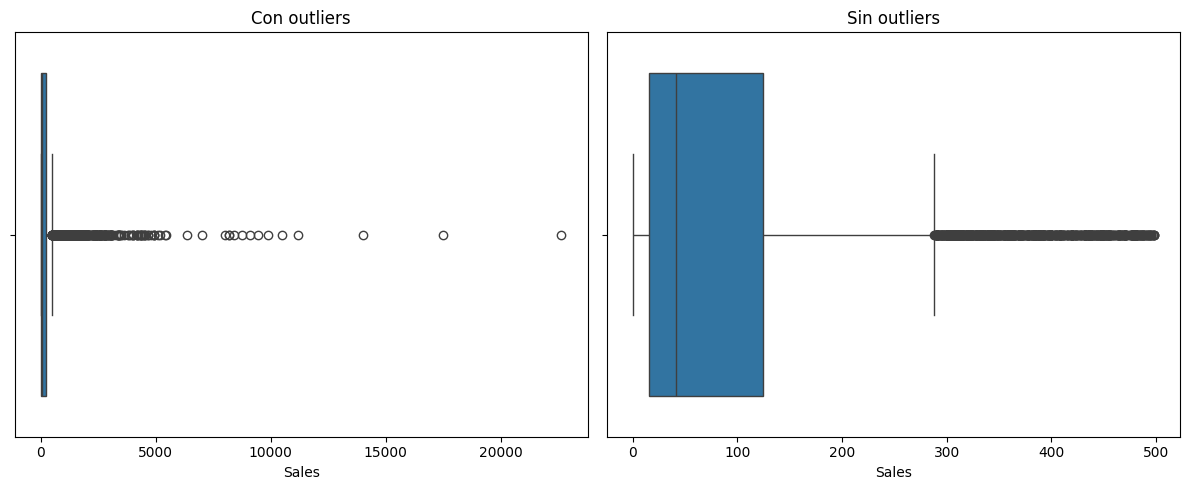

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Sales')
plt.title("Con outliers")

plt.subplot(1, 2, 2)
sns.boxplot(data=df_sin_outliers_iqr, x='Sales')
plt.title("Sin outliers")

plt.tight_layout()
plt.show()


# 🚩 **Decision:**
* Luego de identificar valores outliers mediante el método IQR se decide eliminar dichos registros para que no influyan en medidas estadísticas dejándolas distintas de lo que deberían dar

# **Análisis Posterior:**

# Paso 1: Preparar datos para regresión
**Objetivo:** Predecir el monto de ventas (`Sales`) en función de distintas características del pedido.
### 🎯 Variable objetivo (target):
- `Sales` (numérica continua)

#### 🔍 Variables predictoras:
- `Category` (categórica)  
- `Sub-Category` (categórica)  
- `Segment` (categórica)  
- `Region` (categórica)  
- `Ship Mode` (categórica)  
- `Discount`, `Quantity`, `Profit` (numéricas)  
- `Order Date` → se puede extraer el año (`Year`)



# Paso 2: Preprocesamiento
- Limpiar valores faltantes que en esto caso no hubo
- Convertir distintas variables en númericas para realizar cálculos posteriores
- Verificar y eliminar outliers en la variable `Sales`

# Paso 3: Análisis exploratorio (EDA)
- Distribución de cantidad de compras por Región, tipo de cliente, por año y por ciudad
- Identificacion de outliers

# Paso 4: Entrenamiento de modelo
- ### Modelos a probar:
1. Regresión Lineal para entender relaciones básicas.
2. Random Forest para capturar interacciones y mejorar precisión.
3. Probar XGBoost para lograr un mejor modelo.

# Paso 5: Interpretación y conclusiones
- Optimizar el stock de productos según los productos mas comprados
- Focalizar campañas en regiones con menor volumen.
- Promover productos menos vendidos con descuentos u ofertas.
- Evaluar estrategias de fidelización para segmentos específicos.
- Mejorar el modelo logístico en función del tipo de envío más demandado.

En futuras etapas del proyecto se puede profundizar con técnicas de clustering, sistemas de recomendación o modelos de predicción de demanda.

# Matriz de correlacion de las variables Numéricas

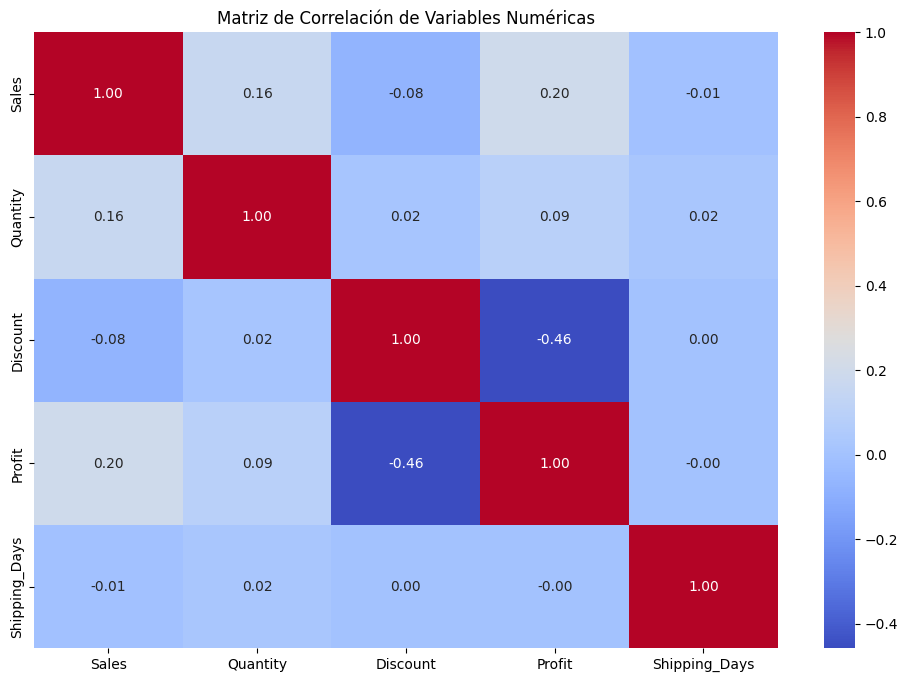

In [49]:
# Columnas numéricas
df_numerical = df_sin_outliers_iqr.select_dtypes(include=['float64', 'int64'])

# Matriz de correlación
correlation_matrix = df_numerical.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

## Conclusiones Finales

## 🔎 Hallazgos Clave del Análisis Exploratorio de Datos (EDA):

*   Ciudades con más compras: New York City, Los Angeles y Philadelphia lideran en volumen de compras.
*   Categoría de producto más vendida: **'Office Supplies'** es la categoría con mayor cantidad de ventas.
*   Evolución de las compras a lo largo de los años: Se observa un crecimiento constante en las compras, con un aumento significativo en **2017**.
*   Región con más compras: La región Oeste **(West)** registra la mayor cantidad de compras en general.
*   Tipo de cliente con más compras: El segmento **'Consumer'** es el que realiza más compras, siendo más prominente en la región Oeste.
*   Días promedio de envío: **'Standard Class'** es el modo de envío más utilizado, con un tiempo de envío promedio de aproximadamente 5 días.
*   Valores atípicos en 'Sales': Se identificaron y eliminaron outliers en la variable **'Sales'** utilizando el método IQR, lo que representó cerca del 11.7% de los datos originales.

## ⏩ Posibles Próximos Pasos:

*   Realizar un análisis más profundo de las características para identificar las más relevantes para la predicción de ventas.
* Realizar un entrenamiento con un modelo de regresión lineal para poder indentificar patrones en las compras.